In [15]:
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [2]:
with open ('data/DC/ngram_1000-contextfunc_delete.json', 'r') as f:
    data = json.load(f)

In [3]:
all_sents = []
for sents in data.values():
    for s in sents:
        all_sents.append(" ".join(s))

In [4]:
len(all_sents)

51501

In [5]:
all_sents[:10]

[' ▁Are',
 '▁Are ▁tourists',
 '▁Are ▁tourists ▁ent iced',
 '▁Are ▁tourists ▁ent iced ▁by',
 '▁Are ▁tourists ▁ent iced ▁by ▁these',
 '▁Are ▁tourists ▁ent iced ▁by ▁these ▁attractions',
 '▁Are ▁tourists ▁ent iced ▁by ▁these ▁attractions ▁threatening',
 '▁Are ▁tourists ▁ent iced ▁by ▁these ▁attractions ▁threatening ▁their',
 '▁Are ▁tourists ▁ent iced ▁by ▁these ▁attractions ▁threatening ▁their ▁very',
 '▁Are ▁tourists ▁ent iced ▁by ▁these ▁attractions ▁threatening ▁their ▁very ▁existence ?']

In [6]:
all_sents[9]

'▁Are ▁tourists ▁ent iced ▁by ▁these ▁attractions ▁threatening ▁their ▁very ▁existence ?'

In [7]:
full_sents_1 = []

In [8]:
for idx, sent in enumerate(all_sents):
    if sent.endswith('.') or sent.endswith('?') or sent.endswith('!'):
        full_sents_1.append(sent)

In [9]:
len(full_sents_1), len(set(full_sents_1))

(2272, 2269)

In [12]:
lens = [len(s.split()) for s in full_sents_1]

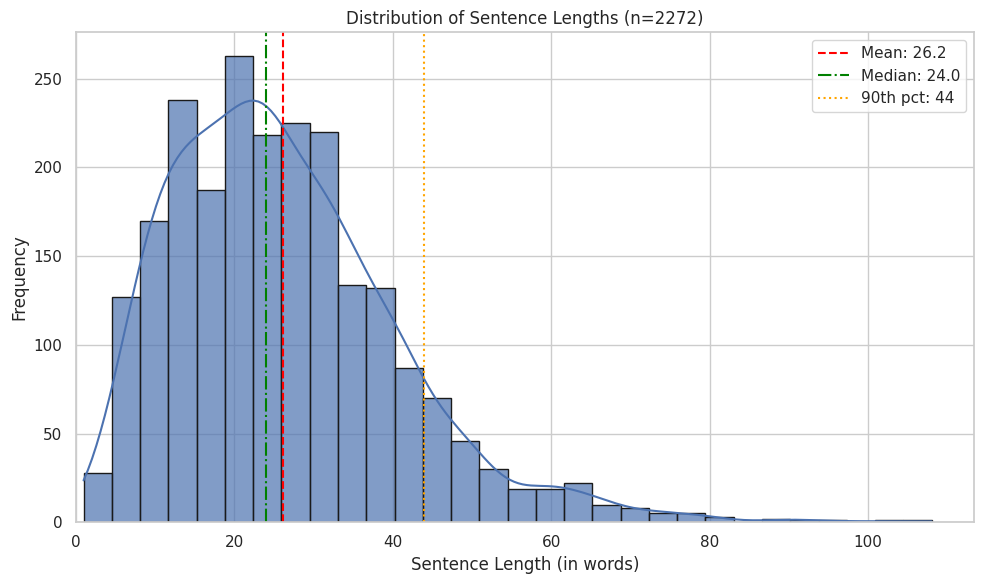

In [18]:
# enhanced histogram with KDE, summary lines and annotations
if not lens:
    print("No data in 'lens'")
else:
    sns.set(style='whitegrid')
    plt.figure(figsize=(10, 6))

    ax = sns.histplot(lens, bins=30, kde=True, color='C0', edgecolor='k', alpha=0.7)

    # basic stats
    n = len(lens)
    mean = sum(lens) / n
    sorted_l = sorted(lens)
    if n % 2 == 1:
        median = sorted_l[n // 2]
    else:
        median = (sorted_l[n // 2 - 1] + sorted_l[n // 2]) / 2
    p90 = sorted_l[max(0, int(0.9 * n) - 1)]

    # vertical lines
    plt.axvline(mean, color='red', linestyle='--', linewidth=1.5, label=f"Mean: {mean:.1f}")
    plt.axvline(median, color='green', linestyle='-.', linewidth=1.5, label=f"Median: {median:.1f}")
    plt.axvline(p90, color='orange', linestyle=':', linewidth=1.5, label=f"90th pct: {p90}")

    # labels, title, legend
    plt.xlabel('Sentence Length (in words)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Sentence Lengths (n={n})')
    plt.legend()

    # nicer layout and optional x-limits
    plt.xlim(left=0)
    plt.tight_layout()

    # save the figure (uncomment to enable)
    # plt.savefig('sentence_length_distribution.png', dpi=150)

    plt.show()